In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.cluster import MiniBatchKMeans
from basic_functions import *

In [8]:
subset_size = 500 #cell number

#REAL trajectory
ys_fixed = Euler_np(params_fixed)
Xtrain_fixed = ys_fixed.transpose()
sample = MiniBatchKMeans(n_clusters=subset_size).fit(Xtrain_fixed).cluster_centers_

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


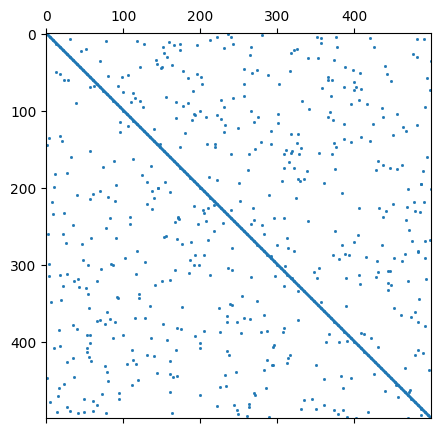

In [9]:
#REAL Markov matrix
M_mat0 = Markov_np(ys_fixed, sample)

#sanity check of Markov matrix
fig = plt.figure(figsize=(5, 5))
plt.spy(M_mat0, precision=0, marker=None, markersize=1, aspect='equal', origin='upper')

In [10]:
def matrix_original_cells(val, param):
    ys = Euler_np(change_param(val, param))
    return Markov_np(ys, sample)
     
def mat_frobenius_norm(test_mat):

    return np.linalg.norm(M_mat0 - test_mat)

In [11]:
def param2distance_rho(val):
    return mat_frobenius_norm(matrix_original_cells(val, "rho"))

def param2distance_sigma(val):
    return mat_frobenius_norm(matrix_original_cells(val, "sigma"))

def param2distance_beta(val):
    return mat_frobenius_norm(matrix_original_cells(val, "beta"))

epsilon = 1e-5
def lin_interp_rho(val):
    x_discrete = np.arange(val - epsilon, val + epsilon, epsilon)
    print(len(x_discrete))
    y_discrete = np.array((param2distance_rho(x_discrete[0]),
                          param2distance_rho(x_discrete[1]),
                          param2distance_rho(x_discrete[2])))
    print(len(y_discrete))
    return np.interp(val, x_discrete, y_discrete)

In [17]:
#Iteration process of nelder-mead
# Custom exception for terminating optimization
class TerminationException(Exception):
    pass

# Define the callback function
def callback(xk):
    callback.iteration += 1
    print(f"Iteration {callback.iteration}: x = {xk}")
    callback.result.append(xk)
    if callback.iteration >= 30:
        raise TerminationException("Terminated.")
##rho
callback.iteration = 0
callback.result = []

# Initial guess
x0 = np.array([44.0])

try:
    # Perform the optimization
    result = scipy.optimize.minimize(param2distance_rho, x0, method="Nelder-Mead", callback=callback).x
except TerminationException:
    print("Optimization terminated.")

# Convert the result list to a NumPy array
predict_rho = np.array(callback.result)

##sigma
callback.iteration = 0
callback.result = []

# Initial guess
x0 = np.array([6.0])

try:
    # Perform the optimization
    result = scipy.optimize.minimize(param2distance_sigma, x0, method="Nelder-Mead", callback=callback).x
except TerminationException:
    print("Optimization terminated.")

# Convert the result list to a NumPy array
predict_sigma = np.array(callback.result)

##beta
callback.iteration = 0
callback.result = []

# Initial guess
x0 = np.array([3.0])

try:
    # Perform the optimization
    result = scipy.optimize.minimize(param2distance_beta, x0, method="Nelder-Mead", callback=callback).x
except TerminationException:
    print("Optimization terminated.")

# Convert the result list to a NumPy array
predict_beta = np.array(callback.result)



Iteration 1: x = [39.6]
Iteration 2: x = [39.6]
Iteration 3: x = [40.7]
Iteration 4: x = [40.15]
Iteration 5: x = [40.15]
Iteration 6: x = [39.875]
Iteration 7: x = [40.0125]
Iteration 8: x = [40.0125]
Iteration 9: x = [40.0125]
Iteration 10: x = [40.0125]
Iteration 11: x = [40.0125]
Iteration 12: x = [40.01679687]
Iteration 13: x = [40.01679687]
Iteration 14: x = [40.01679687]
Iteration 15: x = [40.01679687]
Iteration 16: x = [40.01679687]
Iteration 17: x = [40.01679687]
Iteration 18: x = [40.01679687]
Iteration 19: x = [40.01679687]
Iteration 20: x = [40.01679687]
Iteration 21: x = [40.01679687]
Iteration 22: x = [40.01679687]
Iteration 23: x = [40.01679687]
Iteration 24: x = [40.01679687]
Iteration 25: x = [40.01679687]
Iteration 26: x = [40.01679687]
Iteration 27: x = [40.01679687]
Iteration 28: x = [40.01679687]
Iteration 29: x = [40.01679687]
Iteration 30: x = [40.01679687]
Optimization terminated.
Iteration 1: x = [6.9]
Iteration 2: x = [8.1]
Iteration 3: x = [9.3]
Iteration 4: 

ValueError: x and y must have same first dimension, but have shapes (27,) and (30, 1)

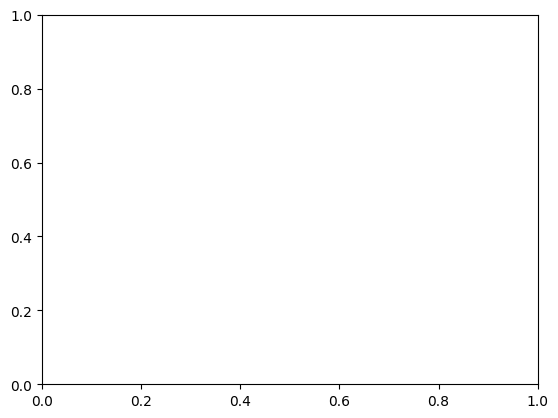

In [20]:
#nelder-mead figure
plt.plot(np.arange(4, len(predict_rho)+1, 1), abs(predict_rho - params_fixed["rho"])**2)
plt.plot(np.arange(1, len(predict_sigma)+1, 1), abs(predict_sigma - params_fixed["sigma"])**2)
plt.plot(np.arange(1, len(predict_beta)+1, 1), abs(predict_beta - params_fixed["beta"])**2)
#plt.scatter(iteration, predict_sigma - 10.)
#plt.scatter(iteration, predict_beta - 1.5)
plt.xlabel("iteration")
plt.ylabel("Error")